# MATH 5760 Project 1

### Elizabeth Maynard, Jackie Hammer, Amber Votek

In [37]:
import csv
import pandas as pd
import math as ma
from scipy import stats
import numpy as np
from scipy.sparse import csc_matrix
from scipy.stats import bernoulli
from scipy.optimize import fsolve
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Question 1)

Before we begin to analyze the data for Adobe, Delta Airlines, and Netflix, we will first declare the procedures we will use for the probabilities later in the problem.

#### Procedure for the probability P[-0.1<log(S(0.25)/S(0))<0.1]

$$log(\frac{S(0.25)}{S(0)}) =log(S(0.25))-log(S(0))$$

$$=log(S(0)e^{(\mu*0.25+\sigma*\sqrt{0.25}*Z)})-log(S(0)) $$

$$=log(S(0))+log(e^{(\mu*0.25+\sigma*\sqrt{0.25}*Z)})-log(S(0))$$

$$=\mu*0.25+\sigma*\sqrt{0.25}*Z$$

$$P[-0.1<log(\frac{S(0.25)}{S(0)})<0.1] $$

$$=P[-0.1<μ*0.25+σ*\sqrt{0.25}*Z<0.1]$$ 

$$=P[\frac{(-0.1-μ*0.25)}{(σ*\sqrt{0.25})}<Z<\frac{(0.1-μ*0.25)}{(σ*\sqrt{0.25})}] $$

$$=Φ(\frac{(0.1-μ*0.25)}{(σ*\sqrt{0.25})})-Φ(\frac{(-0.1-μ*0.25)}{(σ*\sqrt{0.25})})$$

#### Procedure for the probability P[-0.1<log(S(0.5)/S(0))<0.1]

$$log(\frac{S(0.5)}{S(0)}) =log(S(0.5))-log(S(0))$$

$$=log(S(0)e^{(\mu*0.5+\sigma*\sqrt{0.5}*Z)})-log(S(0)) $$

$$=log(S(0))+log(e^{(\mu*0.5+\sigma*\sqrt{0.5}*Z)})-log(S(0))$$

$$=\mu*0.5+\sigma*\sqrt{0.5}*Z$$

$$P[-0.1<log(\frac{S(0.5)}{S(0)})<0.1] $$

$$=P[-0.1<μ*0.5+σ*\sqrt{0.5}*Z<0.1]$$ 

$$=P[\frac{(-0.1-μ*0.5)}{(σ*\sqrt{0.5})}<Z<\frac{(0.1-μ*0.5)}{(σ*\sqrt{0.5})}] $$

$$=Φ(\frac{(0.1-μ*0.5)}{(σ*\sqrt{0.5})})-Φ(\frac{(-0.1-μ*0.5)}{(σ*\sqrt{0.5})})$$

### Part 1: Adobe Data

In [2]:
adobe = pd.read_csv("ADBE.csv")
adobe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-12,606.000000,607.419983,596.479980,600.200012,600.200012,1696200
1,2021-07-13,600.559998,609.330017,598.419983,605.010010,605.010010,1435600
2,2021-07-14,608.140015,611.299988,604.010010,608.830017,608.830017,1376900
3,2021-07-15,608.400024,609.950012,602.650024,606.169983,606.169983,1618100
4,2021-07-16,608.710022,611.619995,603.659973,606.099976,606.099976,1249700


In [102]:
dailyadberet = adobe['Adj Close'].pct_change()
dailyadberet.head()

0         NaN
1    0.008014
2    0.006314
3   -0.004369
4   -0.000115
Name: Adj Close, dtype: float64

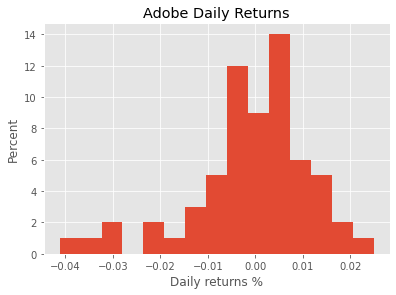

In [7]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
dailyadberet.plot.hist(bins = 15)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Adobe Daily Returns")
plt.show()

In [146]:
dailyadbemean = dailyadberet.mean()
annualadberet = dailyadberet.mean()*252
print("Arithmetic Mu: ",annualadberet*100,"%")

Arithmetic Mu:  -16.234293614206212 %


In [147]:
dailyadbevar = dailyadberet.var()
estimadbevol = np.sqrt(dailyadberet.var()*252)
print("Arithmetic Sigma: ",estimadbevol*100,"%")

Arithmetic Sigma:  19.925185000446234 %


#### Probability For Adobe Stock Using Arithmetic Mu and Sigma:

$$μ=-0.16234$$

$$σ=0.19925$$

$$ P[-0.1<log(\frac{S(0.25)}{S(0)})<0.1] =Φ(1.41)-Φ(-0.60) =0.9207-0.4761 =0.4446$$
$$P[-0.1<log(\frac{S(0.5)}{S(0)})<0.1] =Φ(1.29)-Φ(-0.13) =0.9015-0.4483 =0.4532$$



#### Using Log:

In [101]:
logret = np.log(adobe['Adj Close']) - np.log(adobe['Adj Close'].shift(1))
logret.head()

0         NaN
1    0.007982
2    0.006294
3   -0.004379
4   -0.000115
Name: Adj Close, dtype: float64

In [145]:
dailyadbemeanlog = logret.mean()
annualadberetlog = logret.mean()*252
print("Logarithmic Mu: ",annualadberetlog*100,"%")

Logarithmic Mu:  -18.212932821236112 %


In [144]:
dailyadbevarlog = logret.var()
estimadbevollog = np.sqrt(logret.var()*252)
print("Logarithmic Sigma: ",estimadbevollog*100,"%")

Logarithmic Sigma:  20.06711524616433 %


#### Probability For Adobe Stock Using Logarithmic Mu and Sigma:

$$μ=-0.18213$$

$$σ=0.20067$$

$$P[-0.1<log(\frac{S(0.25)}{S(0)})<0.1] =Φ(1.45)-Φ(-0.54) =0.9265-0.2946 =0.6319$$

$$P[-0.1<log(\frac{S(0.5)}{S(0)})<0.1] =Φ(1.35)-Φ(-0.06) =0.9115-0.4761 =0.4354$$

### Part 2: Delta Airlines Data

In [73]:
deltaair = pd.read_csv("DAL.csv")
deltaair.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-19,38.270000,39.000000,37.560001,38.560001,38.560001,27073800
1,2021-07-20,38.630001,40.820000,38.430000,40.660000,40.660000,17690600
2,2021-07-21,41.009998,42.200001,41.000000,41.610001,41.610001,19145300
3,2021-07-22,41.340000,41.560001,40.410000,41.060001,41.060001,10850600
4,2021-07-23,41.320000,41.630001,40.320000,40.410000,40.410000,10101600


In [74]:
dailydeltaret = deltaair['Adj Close'].pct_change()
dailydeltaret.head()

0         NaN
1    0.054461
2    0.023365
3   -0.013218
4   -0.015831
Name: Adj Close, dtype: float64

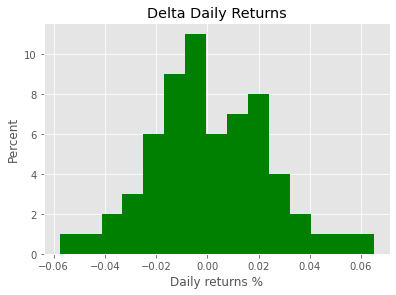

In [78]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
dailydeltaret.plot.hist(bins = 15,color='g')
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Delta Daily Returns")
plt.show()

In [141]:
dailydeltamean = dailydeltaret.mean()
annualdeltaret = dailydeltaret.mean()*252
print("Arithmetic Mu: ",annualdeltaret*100,"%")

Arithmetic Mu:  31.131585206299526 %


In [143]:
dailydeltavar = dailydeltaret.var()
estimdeltavol = np.sqrt(dailydeltaret.var()*252)
print("Arithmetic Sigma: ",estimdeltavol*100,"%")

Arithmetic Sigma:  36.899829636734204 %


#### Probability For Delta Airlines Using Arithmetic Mu and Sigma:

$$μ=0.31132$$

$$σ=0.36890$$

$$P[-0.1<log(\frac{S(0.25)}{S(0)})<0.1] =Φ(0.12)-Φ(-0.96) =0.4522-0.1685 =0.2837$$

$$P[-0.1<log(\frac{S(0.5)}{S(0)})<0.1] =Φ(-0.21)-Φ(-0.98) =0.4168-0.1635 =0.2533$$

#### Using Log:

In [100]:
logretdel = np.log(deltaair['Adj Close']) - np.log(deltaair['Adj Close'].shift(1))
logretdel.head()

0         NaN
1    0.053029
2    0.023096
3   -0.013306
4   -0.015957
Name: Adj Close, dtype: float64

In [90]:
dailydeltameanlog = logretdel.mean()
annualdeltaretlog = logretdel.mean()*252
print("Logarithmic Mu: ",annualdeltaretlog*100,"%")

Log Mu:  24.44507505307154 %


In [89]:
dailydeltavarlog = logretdel.var()
estimdeltavollog = np.sqrt(logretdel.var()*252)
print("Logarithmic Sigma: ",estimdeltavollog*100,"%")

Log Sigma:  36.79045801792152 %


#### Probability For Delta Airlines Stock Using Logarithmic Mu and Sigma:

$$μ=0.24445$$

$$σ=0.36790$$

$$P[-0.1<log(\frac{S(0.25)}{S(0)})<0.1] =Φ(0.21)-Φ(-0.88) =0.5832-0.1894 =0.3938$$

$$P[-0.1<log(\frac{S(0.5)}{S(0)})<0.1] =Φ(-0.09)-Φ(-0.85) =0.4641-0.1977 =0.2664$$

### Part 3: Netflix Data

In [91]:
netflix = pd.read_csv("NFLX.csv")
netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-19,526.049988,534.909973,522.239990,532.280029,532.280029,3885800
1,2021-07-20,526.070007,536.640015,520.299988,531.049988,531.049988,6930400
2,2021-07-21,526.130005,530.989990,505.609985,513.630005,513.630005,11906800
3,2021-07-22,510.209991,513.679993,507.000000,511.769989,511.769989,4328100
4,2021-07-23,512.159973,517.409973,504.660004,515.409973,515.409973,3820500


In [92]:
dailynflxret = netflix['Adj Close'].pct_change()
dailynflxret.head()

0         NaN
1   -0.002311
2   -0.032803
3   -0.003621
4    0.007113
Name: Adj Close, dtype: float64

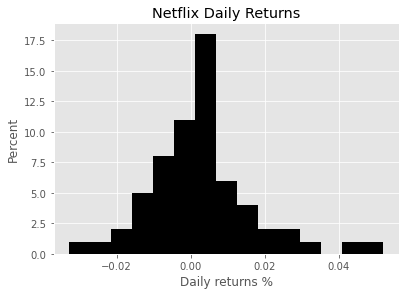

In [94]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
dailynflxret.plot.hist(bins = 15,color='k')
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix Daily Returns")
plt.show()

In [140]:
dailynflxmean = dailynflxret.mean()
annualnflxret = dailynflxret.mean()*252
print("Arithmetic Mu: ",annualnflxret*100,"%")

Arithmetic Mu:  68.94618043457487 %


In [139]:
dailynflxvar = dailynflxret.var()
estimnflxvol = np.sqrt(dailynflxret.var()*252)
print("Arithmetic Sigma: ",estimnflxvol*100,"%")

Arithmetic Sigma:  22.764033536807922 %


#### Probability For Netflix Stock Using Arithmetic Mu and Sigma:

$$μ=0.68946$$

$$σ=0.22764$$

$$P[-0.1<log(\frac{S(0.25)}{S(0)})<0.1] =Φ(-0.64)-Φ(-2.39) =0.2611-0.0084 =0.2527$$

$$P[-0.1<log(\frac{S(0.5)}{S(0)})<0.1] =Φ(-1.52)-Φ(-2.76) =0.0643-0.0021 =0.0622$$

#### Using Log:

In [99]:
logretnflx = np.log(netflix['Adj Close']) - np.log(netflix['Adj Close'].shift(1))
logretnflx.head()

0         NaN
1   -0.002314
2   -0.033353
3   -0.003628
4    0.007087
Name: Adj Close, dtype: float64

In [138]:
dailynflxmeanlog = logretnflx.mean()
annualnflxretlog = logretnflx.mean()*252
print("Logarithmic Mu: ",annualnflxretlog*100,"%")

Logarithmic Mu:  66.33283485788297 %


In [137]:
dailynflxvarlog = logretnflx.var()
estimnflxvollog = np.sqrt(logretnflx.var()*252)
print("Logarithmic Sigma: ",estimnflxvollog*100,"%")

Logarithmic Sigma:  22.590228015450144 %


#### Probability For Netflix Stock Using Logarithmic Mu and Sigma:

$$μ=0.66333$$

$$σ=0.22590$$

$$P[-0.1<log(\frac{S(0.25)}{S(0)})<0.1] =Φ(-0.58)-Φ(-2.35) =0.2810-0.0094 =0.2716$$

$$P[-0.1<log(\frac{S(0.5)}{S(0)})<0.1] =Φ(-1.45)-Φ(-2.70) =0.0735-0.0035 =0.0700$$

### Arithmetic Return Probabilities Explanation

The expressions log(S(0.25)/S(0)) and log(S(0.5)/S(0)) represent the log returns for each stock that can be expected after specific periods of time, that is, t=0.25 (3 months) and t=0.5 (6 months) respectively. The probability that this value will lie in the interval [-0.1,0.1) gives us an idea of how close to zero we can expect the returns to be over the specified interval of time (more time => greater accuracy). A probability of one would represent a guarantee that the magnitude of the returns will be low, while a probability of zero would guarantee that the returns are far from zero.

### Logarithmic vs. Arithmetic Return Differences

The means and volatilities calculated using logarithmic returns yielded significantly higher disparities between the calculated probabilities when compared with the ones calculated using arithmetic returns. The longer the period of time that you are examining is, the more certain you become that your returns will or will not lie in the interval [-0.1,0.1). In the case of these stocks, the logarithmic data shows with greater certainty that the returns will not be in that interval, which we know from the low calculated probabilities. 

## Question 2)

In [59]:
#Binomial Model
def binomialmod(S0,Time,rfi,sig,FS,Nstep):
    deltat = Time/Nstep
    
    uval = ma.exp(sig*ma.sqrt(deltat))
    
    dval = 1/uval
    
    pval = (ma.exp(rfi*deltat)-dval)/(uval-dval)
    
    Res = {}
    
    for aval in range(0,Nstep+1):
            Res[(Nstep,aval)] = FS(S0*(uval**(2*aval-Nstep)))
            
    for bval in range(Nstep-1,-1,-1):
        for evl in range(0,bval+1):
            Res[(bval,evl)]=(pval*Res[(bval+1,evl+1)]*ma.exp(-rfi*deltat)+Res[(bval+1,evl)])*(1-pval)
            
    return Res[(0 , 0)]

In [60]:
def callfunct(K):
    return lambda S: max(S-K,0)

def putfunct(K):
    return lambda S: max(K-S,0)

def futuresfunct(K):
    return lambda S: (S-K)

## Question 3)

In [105]:
#Black Scholes Model
def call_pricebsm(sigma, S0, K, r, T):
    d1 = np.multiply( 1. / sigma * np.divide(1., np.sqrt(T)),
        np.log(S0/K) + (r + sigma**2 / 2.) * T  )
    d2 = d1 - sigma * np.sqrt(T)
    
    Call = np.multiply(S0, norm.cdf(d1)) - \
        np.multiply(norm.cdf(d2) * K, np.exp(-r * T))
    return Call

def put_pricebsm(sigma, S0, K, r, T):
    d1 = np.multiply( 1. / sigma * np.divide(1., np.sqrt(T)),
        np.log(S0/K) + (r + sigma**2 / 2.) * T  )
    d2 = d1 - sigma * np.sqrt(T)
    
    Put = -np.multiply(S0, norm.cdf(-d1)) + \
        np.multiply(norm.cdf(-d2) * K, np.exp(-r * T))
    return Put

### For Strike Price of 90:

In [106]:
print("For S0=100, K=90, T=.25, r=1%, volatility=10%, N=10, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.1,callfunct(90),10))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.1,putfunct(90),10))
print("Call Price Black-Scholes: ",call_pricebsm(.1,100,90,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.1,100,90,.01,.25))

For S0=100, K=90, T=.25, r=1%, volatility=10%, N=10, and a given function F(S):
Call Price Binomial:  10.246082265415968
Put Price Binomial:  0.021363281187323235
Call Price Black-Scholes:  10.25084181445618
Put Price Black-Scholes:  0.026122830227597982


In [107]:
print("For S0=100, K=90, T=.25, r=1%, volatility=10%, N=20, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.1,callfunct(90),20))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.1,putfunct(90),20))
print("Call Price Black-Scholes: ",call_pricebsm(.1,100,90,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.1,100,90,.01,.25))

For S0=100, K=90, T=.25, r=1%, volatility=10%, N=20, and a given function F(S):
Call Price Binomial:  10.249492103814337
Put Price Binomial:  0.02477311958599558
Call Price Black-Scholes:  10.25084181445618
Put Price Black-Scholes:  0.026122830227597982


In [109]:
print("For S0=100, K=90, T=.25, r=1%, volatility=20%, N=10, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.2,callfunct(90),10))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.2,putfunct(90),10))
print("Call Price Black-Scholes: ",call_pricebsm(.2,100,90,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.2,100,90,.01,.25))

For S0=100, K=90, T=.25, r=1%, volatility=20%, N=10, and a given function F(S):
Call Price Binomial:  10.932482811901938
Put Price Binomial:  0.707763827673289
Call Price Black-Scholes:  10.902314011554424
Put Price Black-Scholes:  0.6775950273258271


In [110]:
print("For S0=100, K=90, T=.25, r=1%, volatility=20%, N=20, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.2,callfunct(90),20))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.2,putfunct(90),20))
print("Call Price Black-Scholes: ",call_pricebsm(.2,100,90,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.2,100,90,.01,.25))

For S0=100, K=90, T=.25, r=1%, volatility=20%, N=20, and a given function F(S):
Call Price Binomial:  10.912899905326677
Put Price Binomial:  0.6881809210983297
Call Price Black-Scholes:  10.902314011554424
Put Price Black-Scholes:  0.6775950273258271


In [111]:
print("For S0=100, K=90, T=.25, r=1%, volatility=30%, N=10, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.3,callfunct(90),10))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.3,putfunct(90),10))
print("Call Price Black-Scholes: ",call_pricebsm(.3,100,90,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.3,100,90,.01,.25))

For S0=100, K=90, T=.25, r=1%, volatility=30%, N=10, and a given function F(S):
Call Price Binomial:  12.137227309771623
Put Price Binomial:  1.9125083255430133
Call Price Black-Scholes:  12.187462725342016
Put Price Black-Scholes:  1.9627437411134387


In [112]:
print("For S0=100, K=90, T=.25, r=1%, volatility=30%, N=20, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.3,callfunct(90),20))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.3,putfunct(90),20))
print("Call Price Black-Scholes: ",call_pricebsm(.3,100,90,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.3,100,90,.01,.25))

For S0=100, K=90, T=.25, r=1%, volatility=30%, N=20, and a given function F(S):
Call Price Binomial:  12.233246022310482
Put Price Binomial:  2.008527038082104
Call Price Black-Scholes:  12.187462725342016
Put Price Black-Scholes:  1.9627437411134387


### For Strike Price of 95:

In [113]:
print("For S0=100, K=95, T=.25, r=1%, volatility=10%, N=10, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.1,callfunct(95),10))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.1,putfunct(95),10))
print("Call Price Black-Scholes: ",call_pricebsm(.1,100,95,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.1,100,95,.01,.25))

For S0=100, K=95, T=.25, r=1%, volatility=10%, N=10, and a given function F(S):
Call Price Binomial:  5.605849489885704
Put Price Binomial:  0.368646117644362
Call Price Black-Scholes:  5.587372578104066
Put Price Black-Scholes:  0.35016920586276257


In [114]:
print("For S0=100, K=95, T=.25, r=1%, volatility=10%, N=20, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.1,callfunct(95),20))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.1,putfunct(95),20))
print("Call Price Black-Scholes: ",call_pricebsm(.1,100,95,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.1,100,95,.01,.25))

For S0=100, K=95, T=.25, r=1%, volatility=10%, N=20, and a given function F(S):
Call Price Binomial:  5.590591094715872
Put Price Binomial:  0.3533877224748384
Call Price Black-Scholes:  5.587372578104066
Put Price Black-Scholes:  0.35016920586276257


In [115]:
print("For S0=100, K=95, T=.25, r=1%, volatility=20%, N=10, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.2,callfunct(95),10))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.2,putfunct(95),10))
print("Call Price Black-Scholes: ",call_pricebsm(.2,100,95,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.2,100,95,.01,.25))

For S0=100, K=95, T=.25, r=1%, volatility=20%, N=10, and a given function F(S):
Call Price Binomial:  7.069421614109351
Put Price Binomial:  1.8322182418680015
Call Price Black-Scholes:  7.050014923545632
Put Price Black-Scholes:  1.8128115513043639


In [116]:
print("For S0=100, K=95, T=.25, r=1%, volatility=20%, N=20, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.2,callfunct(95),20))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.2,putfunct(95),20))
print("Call Price Black-Scholes: ",call_pricebsm(.2,100,95,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.2,100,95,.01,.25))

For S0=100, K=95, T=.25, r=1%, volatility=20%, N=20, and a given function F(S):
Call Price Binomial:  7.04447324282766
Put Price Binomial:  1.8072698705866264
Call Price Black-Scholes:  7.050014923545632
Put Price Black-Scholes:  1.8128115513043639


In [117]:
print("For S0=100, K=95, T=.25, r=1%, volatility=30%, N=10, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.3,callfunct(95),10))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.3,putfunct(95),10))
print("Call Price Black-Scholes: ",call_pricebsm(.3,100,95,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.3,100,95,.01,.25))

For S0=100, K=95, T=.25, r=1%, volatility=30%, N=10, and a given function F(S):
Call Price Binomial:  8.942807258479458
Put Price Binomial:  3.705603886238148
Call Price Black-Scholes:  8.810191209069345
Put Price Black-Scholes:  3.572987836828048


In [118]:
print("For S0=100, K=95, T=.25, r=1%, volatility=30%, N=20, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.3,callfunct(95),20))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.3,putfunct(95),20))
print("Call Price Black-Scholes: ",call_pricebsm(.3,100,95,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.3,100,95,.01,.25))

For S0=100, K=95, T=.25, r=1%, volatility=30%, N=20, and a given function F(S):
Call Price Binomial:  8.8404288991822
Put Price Binomial:  3.60322552694113
Call Price Black-Scholes:  8.810191209069345
Put Price Black-Scholes:  3.572987836828048


### For Strike Price of 100:

In [119]:
print("For S0=100, K=100, T=.25, r=1%, volatility=10%, N=10, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.1,callfunct(100),10))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.1,putfunct(100),10))
print("Call Price Black-Scholes: ",call_pricebsm(.1,100,100,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.1,100,100,.01,.25))

For S0=100, K=100, T=.25, r=1%, volatility=10%, N=10, and a given function F(S):
Call Price Binomial:  2.070182299329267
Put Price Binomial:  1.8204945390752263
Call Price Black-Scholes:  2.1193464816249374
Put Price Black-Scholes:  1.8696587213709392


In [120]:
print("For S0=100, K=100, T=.25, r=1%, volatility=10%, N=20, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.1,callfunct(100),20))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.1,putfunct(100),20))
print("Call Price Black-Scholes: ",call_pricebsm(.1,100,100,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.1,100,100,.01,.25))

For S0=100, K=100, T=.25, r=1%, volatility=10%, N=20, and a given function F(S):
Call Price Binomial:  2.0945806783047494
Put Price Binomial:  1.8448929180510218
Call Price Black-Scholes:  2.1193464816249374
Put Price Black-Scholes:  1.8696587213709392


In [121]:
print("For S0=100, K=100, T=.25, r=1%, volatility=20%, N=10, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.2,callfunct(100),10))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.2,putfunct(100),10))
print("Call Price Black-Scholes: ",call_pricebsm(.2,100,100,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.2,100,100,.01,.25))

For S0=100, K=100, T=.25, r=1%, volatility=20%, N=10, and a given function F(S):
Call Price Binomial:  4.010664304717702
Put Price Binomial:  3.7609765444636563
Call Price Black-Scholes:  4.108870089208018
Put Price Black-Scholes:  3.85918232895402


In [122]:
print("For S0=100, K=100, T=.25, r=1%, volatility=20%, N=20, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.2,callfunct(100),20))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.2,putfunct(100),20))
print("Call Price Black-Scholes: ",call_pricebsm(.2,100,100,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.2,100,100,.01,.25))

For S0=100, K=100, T=.25, r=1%, volatility=20%, N=20, and a given function F(S):
Call Price Binomial:  4.0594002302866246
Put Price Binomial:  3.809712470032899
Call Price Black-Scholes:  4.108870089208018
Put Price Black-Scholes:  3.85918232895402


In [123]:
print("For S0=100, K=100, T=.25, r=1%, volatility=30%, N=10, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.3,callfunct(100),10))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.3,putfunct(100),10))
print("Call Price Black-Scholes: ",call_pricebsm(.3,100,100,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.3,100,100,.01,.25))

For S0=100, K=100, T=.25, r=1%, volatility=30%, N=10, and a given function F(S):
Call Price Binomial:  5.949530371576235
Put Price Binomial:  5.699842611322231
Call Price Black-Scholes:  6.096736604446896
Put Price Black-Scholes:  5.847048844192912


In [124]:
print("For S0=100, K=100, T=.25, r=1%, volatility=30%, N=20, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.3,callfunct(100),20))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.3,putfunct(100),20))
print("Call Price Black-Scholes: ",call_pricebsm(.3,100,100,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.3,100,100,.01,.25))

For S0=100, K=100, T=.25, r=1%, volatility=30%, N=20, and a given function F(S):
Call Price Binomial:  6.022583421394168
Put Price Binomial:  5.772895661140405
Call Price Black-Scholes:  6.096736604446896
Put Price Black-Scholes:  5.847048844192912


### For Strike Price of 105:

In [125]:
print("For S0=100, K=105, T=.25, r=1%, volatility=10%, N=10, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.1,callfunct(105),10))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.1,putfunct(105),10))
print("Call Price Black-Scholes: ",call_pricebsm(.1,100,105,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.1,100,105,.01,.25))

For S0=100, K=105, T=.25, r=1%, volatility=10%, N=10, and a given function F(S):
Call Price Binomial:  0.5127190665277186
Put Price Binomial:  5.250546918260978
Call Price Black-Scholes:  0.48996585353435407
Put Price Black-Scholes:  5.227793705267672


In [126]:
print("For S0=100, K=105, T=.25, r=1%, volatility=10%, N=20, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.1,callfunct(105),20))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.1,putfunct(105),20))
print("Call Price Black-Scholes: ",call_pricebsm(.1,100,105,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.1,100,105,.01,.25))

For S0=100, K=105, T=.25, r=1%, volatility=10%, N=20, and a given function F(S):
Call Price Binomial:  0.4855605471369956
Put Price Binomial:  5.223388398870572
Call Price Black-Scholes:  0.48996585353435407
Put Price Black-Scholes:  5.227793705267672


In [127]:
print("For S0=100, K=105, T=.25, r=1%, volatility=20%, N=10, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.2,callfunct(105),10))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.2,putfunct(105),10))
print("Call Price Black-Scholes: ",call_pricebsm(.2,100,105,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.2,100,105,.01,.25))

For S0=100, K=105, T=.25, r=1%, volatility=20%, N=10, and a given function F(S):
Call Price Binomial:  2.1789199978789666
Put Price Binomial:  6.916747849612223
Call Price Black-Scholes:  2.142580320135739
Put Price Black-Scholes:  6.8804081718690355


In [128]:
print("For S0=100, K=105, T=.25, r=1%, volatility=20%, N=20, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.2,callfunct(105),20))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.2,putfunct(105),20))
print("Call Price Black-Scholes: ",call_pricebsm(.2,100,105,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.2,100,105,.01,.25))

For S0=100, K=105, T=.25, r=1%, volatility=20%, N=20, and a given function F(S):
Call Price Binomial:  2.121360352108116
Put Price Binomial:  6.859188203841704
Call Price Black-Scholes:  2.142580320135739
Put Price Black-Scholes:  6.8804081718690355


In [129]:
print("For S0=100, K=105, T=.25, r=1%, volatility=30%, N=10, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.3,callfunct(105),10))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.3,putfunct(105),10))
print("Call Price Black-Scholes: ",call_pricebsm(.3,100,105,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.3,100,105,.01,.25))

For S0=100, K=105, T=.25, r=1%, volatility=30%, N=10, and a given function F(S):
Call Price Binomial:  4.181563754232195
Put Price Binomial:  8.919391605965494
Call Price Black-Scholes:  4.039769415489424
Put Price Black-Scholes:  8.777597267222724


In [130]:
print("For S0=100, K=105, T=.25, r=1%, volatility=30%, N=20, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.3,callfunct(105),20))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.3,putfunct(105),20))
print("Call Price Black-Scholes: ",call_pricebsm(.3,100,105,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.3,100,105,.01,.25))

For S0=100, K=100, T=.25, r=1%, volatility=30%, N=20, and a given function F(S):
Call Price Binomial:  4.082029732711541
Put Price Binomial:  8.819857584445081
Call Price Black-Scholes:  4.039769415489424
Put Price Black-Scholes:  8.777597267222724


### For Strike Price of 110:

In [131]:
print("For S0=100, K=110, T=.25, r=1%, volatility=10%, N=10, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.1,callfunct(110),10))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.1,putfunct(110),10))
print("Call Price Black-Scholes: ",call_pricebsm(.1,100,110,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.1,100,110,.01,.25))

For S0=100, K=110, T=.25, r=1%, volatility=10%, N=10, and a given function F(S):
Call Price Binomial:  0.04365739724880866
Put Price Binomial:  9.769000860969374
Call Price Black-Scholes:  0.06480746505400914
Put Price Black-Scholes:  9.790150928774622


In [132]:
print("For S0=100, K=110, T=.25, r=1%, volatility=10%, N=20, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.1,callfunct(110),20))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.1,putfunct(110),20))
print("Call Price Black-Scholes: ",call_pricebsm(.1,100,110,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.1,100,110,.01,.25))

For S0=100, K=110, T=.25, r=1%, volatility=10%, N=20, and a given function F(S):
Call Price Binomial:  0.06030617411886743
Put Price Binomial:  9.78564963783975
Call Price Black-Scholes:  0.06480746505400914
Put Price Black-Scholes:  9.790150928774622


In [133]:
print("For S0=100, K=110, T=.25, r=1%, volatility=20%, N=10, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.2,callfunct(110),10))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.2,putfunct(110),10))
print("Call Price Black-Scholes: ",call_pricebsm(.2,100,110,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.2,100,110,.01,.25))

For S0=100, K=110, T=.25, r=1%, volatility=20%, N=10, and a given function F(S):
Call Price Binomial:  1.0459011419259476
Put Price Binomial:  10.771244605646507
Call Price Black-Scholes:  0.9981520040860481
Put Price Black-Scholes:  10.723495467806657


In [134]:
print("For S0=100, K=110, T=.25, r=1%, volatility=20%, N=20, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.2,callfunct(110),20))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.2,putfunct(110),20))
print("Call Price Black-Scholes: ",call_pricebsm(.2,100,110,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.2,100,110,.01,.25))

For S0=100, K=110, T=.25, r=1%, volatility=20%, N=20, and a given function F(S):
Call Price Binomial:  0.9811317984708214
Put Price Binomial:  10.706475262191717
Call Price Black-Scholes:  0.9981520040860481
Put Price Black-Scholes:  10.723495467806657


In [135]:
print("For S0=100, K=110, T=.25, r=1%, volatility=30%, N=10, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.3,callfunct(110),10))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.3,putfunct(110),10))
print("Call Price Black-Scholes: ",call_pricebsm(.3,100,110,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.3,100,110,.01,.25))

For S0=100, K=110, T=.25, r=1%, volatility=30%, N=10, and a given function F(S):
Call Price Binomial:  2.4231612519937276
Put Price Binomial:  12.148504715714328
Call Price Black-Scholes:  2.5665248867790886
Put Price Black-Scholes:  12.291868350499698


In [136]:
print("For S0=100, K=110, T=.25, r=1%, volatility=30%, N=20, and a given function F(S):")
print("Call Price Binomial: ",binomialmod(100,.25,.01,.3,callfunct(110),20))
print("Put Price Binomial: ",binomialmod(100,.25,.01,.3,putfunct(110),20))
print("Call Price Black-Scholes: ",call_pricebsm(.3,100,110,.01,.25))
print("Put Price Black-Scholes: ",put_pricebsm(.3,100,110,.01,.25))

For S0=100, K=110, T=.25, r=1%, volatility=30%, N=20, and a given function F(S):
Call Price Binomial:  2.6172621606102147
Put Price Binomial:  12.34260562433106
Call Price Black-Scholes:  2.5665248867790886
Put Price Black-Scholes:  12.291868350499698


## Summary of Work Done:

We initially begin this project by importing all of our important libraries included in python- i.e. Numpy, Math, and Pandas. We also import pieces of the scipy library as well.

For question 1, we start off by declaring the equations we will be using to solve for the probabilties later in the problem (so that we don't need to keep declaring them every time we try to solve for a probability for each of our stocks). 

We then go into the analysis of our first stock, Adobe, where we use the pandas library to import the csv of the stocks downloaded from Yahoo Finance for the previous three months. After the import, we print the first few rows of the dataframe to ensure it imported properly. We then caclulate the daily returns for the stocks, and plot the resulting set of values in a histogram consisting of 15 bins each (this same initial process up until the histogram plot will be repeated for both Delta Airlines and Netflix stocks). 

Next, we begin to calculate our mu and sigma by finding the mean of the daily returns, and then multiplying by 252 to obtain our mu, which we then printed out and converted to a percentage. For Adobe, our resulting mu was -16.2343%. We then find our sigma by finding the variance of the daily returns, multiplying by 252, then taking the square root. We then also converted to a percentage and printed the result. Our sigma for Adobe was 19.9252%. Using the Arithmetic mu and sigma, we found the probabilities requested through our declared equations from the beginning of the problem, where for Adobe, for S(.25) our probability was .4446, and for S(.5) our probability was .4532. We then go on to calculate our log returns by taking the log of the ratio of the day's return over the previous day's return. We then multiply the mean of those returns by 252 to obtain a mu for the Log Returns that is -18.2129% for Adobe. Similarly, we take the square root of the variance multiplied by 252 to get our Log Sigma which is 20.0671%. Next, we find the probabilities using our log mu and sigma which are .6319 for S(.25) and .4354 for S(.5).

This process was again repeated for Delta Airlines. Where our Arithmetic Mu was 31.13158% and our Arithmetic Sigma was 36.8998%. Our resulting probabilities for Arithmetic Mu and Sigma were .2837 for S(.25) and .2533 for S(.5). Similarly to Adobe, we also find our Log Mu and Log Sigma, which are 24.4451% and 36.7905% respectively, giving us a resulting probability of .3938 for S(.25) and .2664 for S(.5) as well.

We finally once again repeated the same process as Adobe and Delta Airlines for Netflix. This gave us a Mu of 68.9462% and Sigma of 22.76403%, resulting in probabilties of .2527 for S(.25) and .0622 for S(.5). And again we find our Log Mu and Log Sigma which are 66.3328% and 22.5902% respectively. This gives us probabilities .2716 for S(.25) and .0700 for S(.5).

We finally wrap up with a discussion of what the Arithmetic probabilities mean, and why they are important. We then discuss the difference between the Arithmetic Return and Logarithmic Returns to conclude question 2.


For Question 2, we declare a function binomialmod that takes the variables S0 for initial stock value, Time for time to expiry, rfi for risk-free interest rate, sig for our volatility, FS for the function that will determine whether the model will find a call, put, futures contract, any desired function can be input into FS, and then finally Nstep for the number of steps we want to take. Within the function, we declare deltat to be equal to T/N. We also declare uval to be equal to e^(sig * sqrt(deltat)). We then declare dval=1/uval, pval = (e^(rfi * deltat) - dval)/(uval - dval), and then set a result = empty array = Res, where for a in range of (0,Nstep+1), our Res[(Nstep, aval)] = FS(S0 * (uval^(2aval - Nstep))), and then bval in range of (Nstep-1, -1, -1), for an evl in range of (0,bval+1), we find Res[(bval,evl)] = e^(-rfi * deltat) * (pval * Res[(bval+1,evl+1)] + (1 - p) * Res[(bval+1,evl)], we finally return our value for Res[(0,0)].

We then declare three other functions. A callfunct, putfunct, and futuresfunct. Each of these functions only take K as an input, K being the strike price. We find callfunct to just return lambda S: max(S-K, 0), our putfunct to return lambda S: max(K-S, 0), and then our futuresfunct to return lambda S: (S-K). We use our call and put functions in number 3, but we declare futures to show that our binommod function can take any desired FS, and not just Call and Put. All of this concludes question 2.


For Question 3, we first declare a Black-Scholes Model to compare the results of our binomialmod function to. The Black-Scholes Model consists of two separate functions, Call and Put. Our call function take the inputs (sigma, S0, K, r, T) where sigma = volatility, S0 = Initial stock price, K = Strike Price, r = Risk-free interest rate, and T = Time to expiry. (We also state that our put function takes the exact same variables). For call_pricebsm, we declare d1 d2, and Call, where we return the value of Call. For put_pricebsm, we similarly declare d1 and d2, but we instead declare Put and return the value of Put.

We finally bring this all together by using the given strike prices 90, 95, 100, 105, and 110, and the volatilities of 10%, 20%, and 30%, with the N-steps being 10 and 20. Given the combination of these variables, we obtain 30 different results that show that our binomial model is quite similar to the Black-Scholes model, being recognizably close to each other. Seeing this, we conclude question 3.